In [0]:
# Perceptron

In [0]:
# lib load
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris

In [0]:
# make data, which should be linearly separable
# n, the amount of positives, or the amount of negatives, so the total data is 2n
# return an array (2*n,4)
def create_data(n):
  np.random.seed(1)
  x_11 = np.random.randint(0,100,(n,1))
  x_12 = np.random.randint(0,100,(n,1,))
  x_13 = np.random.randint(0,10,(n,1,))
  x_21 = np.random.randint(0,100,(n,1))
  x_22 = np.random.randint(0,100,(n,1))
  x_23 = np.random.randint(0,10,(n,1,))

  new_x_12 = x_12*np.sqrt(2)/2-x_13*np.sqrt(2)/2 ## rotate 45 degree through x axis
  new_x_13 = x_12*np.sqrt(2)/2-x_13*np.sqrt(2)/2 ## rotate 45 degree through x axis
  new_x_22 = x_22*np.sqrt(2)/2-x_23*np.sqrt(2)/2 ## rotate 45 degree through x axis
  new_x_23 = x_22*np.sqrt(2)/2-x_23*np.sqrt(2)/2 ## rotate 45 degree through x axis

  plus_samples = np.hstack([x_11, new_x_12, new_x_13, np.ones((n,1))])
  minus_samples = np.hstack([x_21, new_x_22, new_x_23, -np.ones((n,1))])
  samples = np.vstack([plus_samples, minus_samples])
  np.random.shuffle(samples) # mixed data
  return samples

In [0]:
# build the function for plotting the data
# ax: an instance of Axes3D, for plots
# samples, array, (N, n_features+1)
def plot_samples(ax, samples):
  Y=samples[:,-1]
  Y=samples[:,-1]
  position_p=Y==1
  position_m=Y==-1
  ax.scatter(samples[position_p,0], samples[position_p,1],
             samples[position_p,2], marker='+', label='+',color='b')
  ax.scatter(samples[position_m,0], samples[position_m,1],
             samples[position_m,2], marker='^',label='-',color='y')

<command-1622315638328866>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


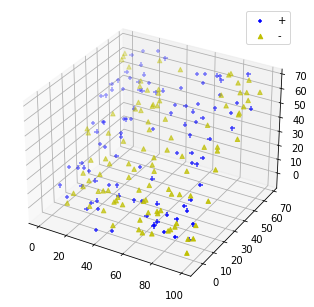

In [0]:
# run a instance
fig = plt.figure()
ax=Axes3D(fig)
data = create_data(100)
plot_samples(ax,data)
ax.legend(loc='best')
plt.show()

In [0]:
# the orginal format of perceptron

# step1, iterate all points
# if missclassification, gradient descent and break
# recalculate it and if not missclassified, then choose another point
def perceptron(train_data, eta, w_0, b_0):
  x=train_data[:,:-1]
  y=train_data[:,-1]
  length=train_data.shape[0]
  w = w_0
  b = b_0
  step_num = 0
  while True:
    i=0
    while (i<length):
      step_num+=1
      x_i=x[i].reshape((x.shape[1],1))
      y_i=y[i]
      if y_i*(np.dot(np.transpose(w),x_i)+b) <=0:
        w=w+eta*y_i*x_i
        b=b+eta*y_i
        break
      else:
        i+=1
    if(i==length):
      break
  return (w,b,step_num)

In [0]:
# plot super plane for separation
# x: array of values of x axis
# y: array of values of y axis
# w: super plane w
# b: intercept
def create_hyperplane(x,y,w,b):
  return (-w[0][0]*x - w[1][0]*y - b)/w[2][0]

In [0]:
data = create_data(100)
eta, w_0, b_0 = 0.1, np.ones((3,1), dtype = float),1
w,b,num=perceptron(data,eta,w_0,b_0)

fig = plt.figure()
plt.suptitle('perceptron')
ax=Axes3D(fig)

plot_samples(ax,data)

x=np.linspace(-30,100,100)
y=np.linspace(-30,100,100)
x,y=np.meshgrid(x,y)
z=create_hyperplane(x,y,w,b)
ax.plot_surface(x,y,z,rstride=1,cstride=1,color='g',alpha=.2)

ax.legend(loc='best')
plt.show()

In [0]:
# peceptron, dual format
def create_w(train_data,alpha):
  x=train_data[:,:-1]
  y=train_data[:,-1]
  N=train_data,shape[0]
  w=np.zeros((x.shape[1],1))
  for i in range(0,N):
    w=w+alpha[i][0]*y[i]*(x[i].reshape(x[i].size,1))
  return w

def perceptron_dual(train_data, eta, alpha_0, b_0):
  x=train_data[:,:-1]
  y=train_data[:,-1]
  length=train_data.shape[0]
  alpha=alpha_0
  b=b_0
  step_num=0
  while True:
    i=0
    while (i<length):
      step_num+=1
      x_i=x[i].reshape((x.shape[1],1))
      y_i=y[i]
      w=create_w(train_data, alpha)
      z=y_i*(np.dot(np.transpose(w),x_i)+b)
      if z <= 0:
        alpha[i][0]+=eta
        b+=eta*y_i
        break
    else:
      i+=1
  if i==length:
    break
  return (alpha,b,step_num)

In [0]:
# the most samples are not contributed to the final plane or classification, so the separated plane depends on the small sort of samples
# using dual format could find those very fast